In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer,AutoModelForSequenceClassification

In [8]:
df=pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [10]:
df.shape

(568454, 10)

In [11]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [12]:
df.dropna(inplace=True,axis=0)

In [13]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

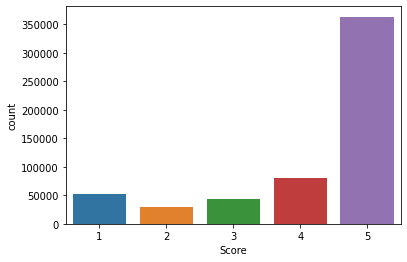

In [26]:
sns.countplot(df.Score)

In [63]:
print('users with over 5 reviews  :',(df['UserId'].value_counts() >  5).sum())
print('users with over 10 reviews :',(df['UserId'].value_counts() > 10).sum())
print('users with over 15 reviews :',(df['UserId'].value_counts() > 15).sum())
print('users with over 20 reviews :',(df['UserId'].value_counts() > 20).sum())
print('users with over 25 reviews :',(df['UserId'].value_counts() > 25).sum())

users with over 5 reviews  : 18175
users with over 10 reviews : 6358
users with over 15 reviews : 2891
users with over 20 reviews : 1702
users with over 25 reviews : 1056


In [62]:
(df['UserId'].value_counts()>10).sum()

6358

In [60]:
(df['UserId'].value_counts()>20).sum()

1702

In [28]:
one_score_df=df[df['Score']==1].sample(2000)
two_score_df=df[df['Score']==2].sample(2000)
three_score_df=df[df['Score']==3].sample(2000)
four_score_df=df[df['Score']==4].sample(2000)
five_score_df=df[df['Score']==5].sample(2000)
df1=pd.concat([one_score_df,two_score_df,three_score_df,four_score_df,five_score_df])

In [29]:
df1.shape

(10000, 10)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

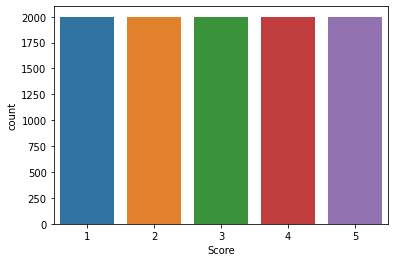

In [31]:
sns.countplot(df1.Score)

In [52]:
(df1['ProductId'].value_counts()>5).sum()

181

In [21]:
df1=df1[['Id', 'Score', 'Time', 'Summary', 'Text']]

In [22]:
df1.head(3)

,Id,Score,Time,Summary,Text
48908,48909,5,1342483200,Love This /Coffee,I had been purchasing whole bean coffee in the...
418974,418975,4,1328832000,"Crunch, tasty, organic and a decent amount of ...",I'm pretty pleased with this cereal. Unlike ot...
561272,561273,3,1333497600,"Probably great for you, but tastes terrible",I bought this because lots of people said it h...


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 48908 to 280922
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       10000 non-null  int64 
 1   Score    10000 non-null  int64 
 2   Time     10000 non-null  int64 
 3   Summary  10000 non-null  object
 4   Text     10000 non-null  object
dtypes: int64(3), object(2)
memory usage: 726.8+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

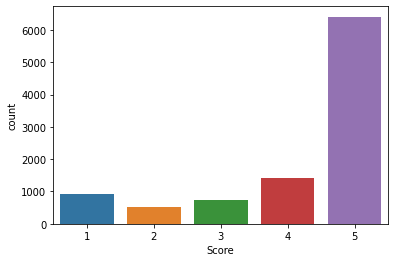

In [25]:
sns.countplot(df1.Score)

In [ ]:
df